In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from Lux.model.conf import *


In [3]:
model_df = pd.read_pickle(f"results/Model_vars{LOG_NAME_SUFFIX}.pkl")
model_df = model_df.rolling(5, min_periods=1).mean()

model_df.head()

,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope
0,10.000000,8.0,9.9900,182.000000,0.090000,0.000000
1,9.500000,8.0,9.9850,182.500000,0.087500,-0.166667
2,9.666667,8.0,9.9800,182.333333,0.088333,-0.277778
3,9.750000,8.0,9.9775,182.250000,0.088750,-0.358333
4,9.800000,8.0,9.9780,182.200000,0.089000,-0.386667


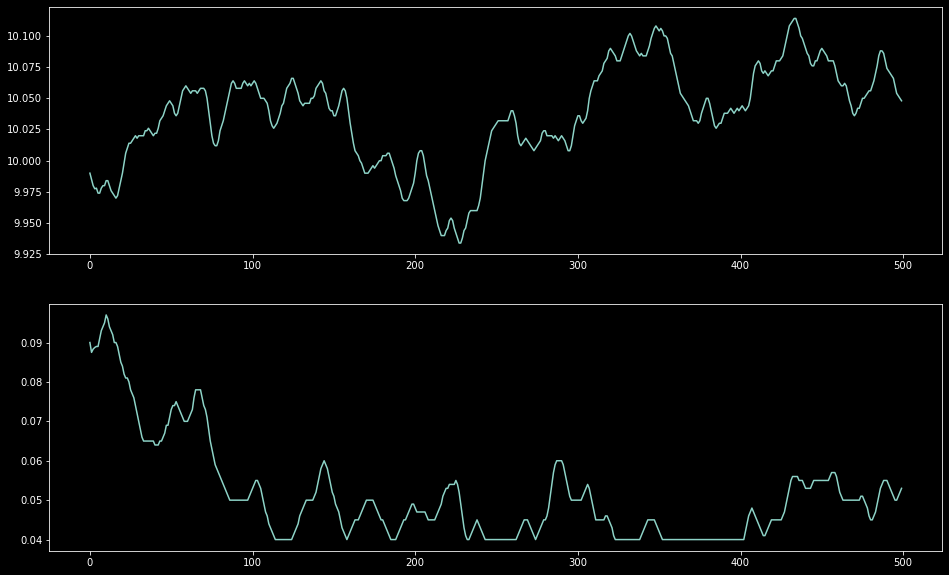

In [4]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)

ax[1].plot(model_df.technical_fraction)


In [5]:
edt = (model_df.tech_optimists - model_df.tech_pessimists) * tc  # excess technical demand
edf = model_df.nf * gamma * (pf - model_df.price)

model_df["edt"] = edt
model_df["edf"] = edf
model_df["ed"]  = edt + edf

model_df.head()

,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope,edt,edf,ed
0,10.000000,8.0,9.9900,182.000000,0.090000,0.000000,0.040000,0.018200,0.058200
1,9.500000,8.0,9.9850,182.500000,0.087500,-0.166667,0.030000,0.027375,0.057375
2,9.666667,8.0,9.9800,182.333333,0.088333,-0.277778,0.033333,0.036467,0.069800
3,9.750000,8.0,9.9775,182.250000,0.088750,-0.358333,0.035000,0.041006,0.076006
4,9.800000,8.0,9.9780,182.200000,0.089000,-0.386667,0.036000,0.040084,0.076084


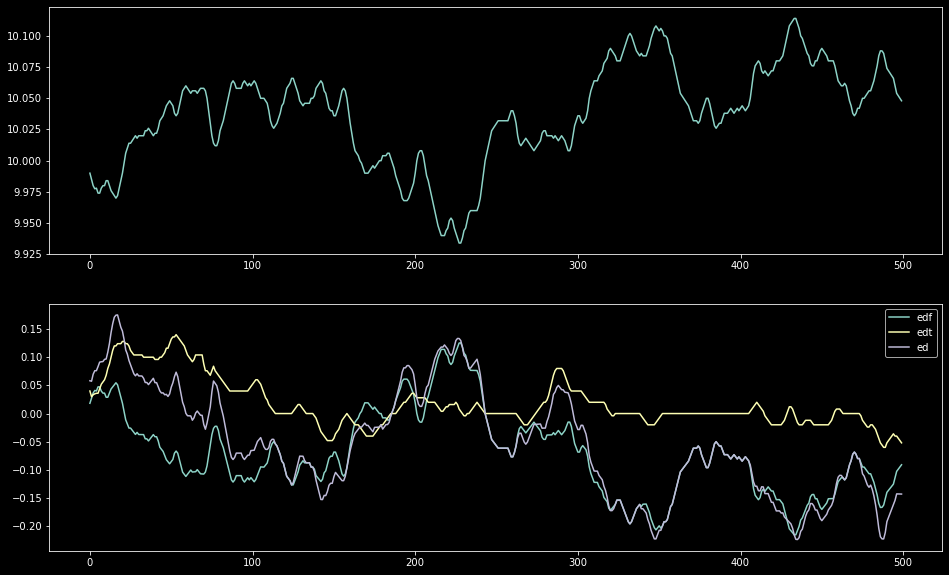

In [6]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)
ax[1].plot(model_df.edf, label="edf")
ax[1].plot(model_df.edt, label="edt")
ax[1].plot(model_df.ed, label="ed")
ax[1].legend()

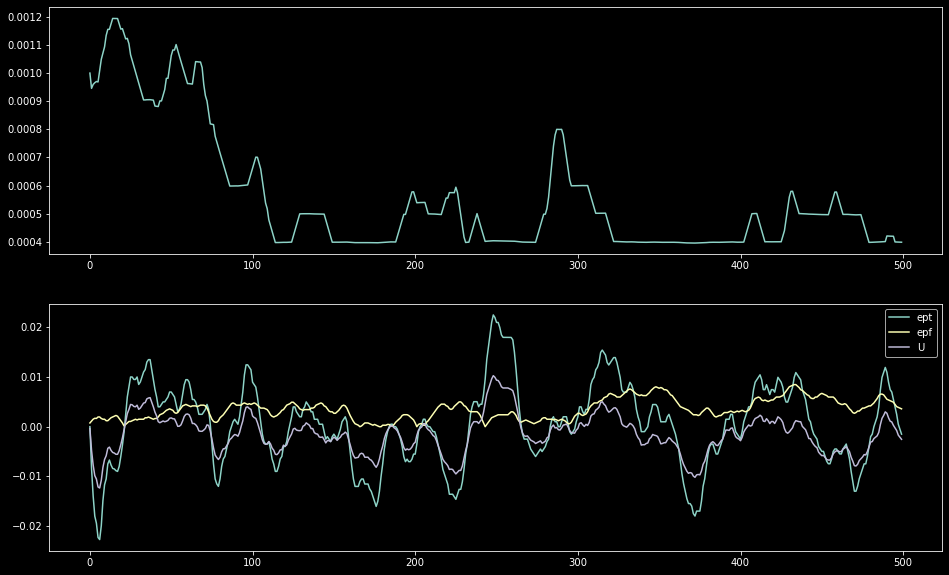

In [7]:
ept = (r + model_df.slope / v2) / model_df.price - R
epf = s * abs((model_df.price - pf) / model_df.price)

U = a3 * (ept - epf)
p_transition = v2 * model_df.tech_optimists / N * np.exp(U) * DT

fig, ax = plt.subplots(2, 1, figsize=(16,10))
ax[0].plot(p_transition)
ax[1].plot(ept, label="ept")
ax[1].plot(epf, label="epf")
ax[1].plot(U, label="U")
ax[1].legend()